# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

6. <font size="3.5">[Subbands](#sixth-chapter)<br></font>
    6.1. [Quantum wells, wires, dots, and “nanotubes”](#6.1)<br>
    6.2. [Density of states](#6.2)<br>
    6.3. [Minimum resistance of a wire](#6.3)<br>
    [_References_](#references)<br>

***

# 6. Subbands <a id="sixth-chapter"></a>

## <font color = "navy" >6.1 Quantum wells, wires, dots, and “nanotubes” </font> <a id="6.1"></a>

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.</u> </font>

In [1]:
%reset -f
%matplotlib inline
from pylab import *

In [2]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=2.45e-10*4/sqrt(3); m=9.110e-31;
d1=array([1,1,1])/4; d2=array([1,-1,-1])/4; d3=array([-1,1,-1])/4; d4=array([-1,-1,1])/4;

#sp3s* model parameters
soa=0.3787/3; soc=0.0129/3;
Esa=-8.3431; Epa=1.0414; Esc=-2.6569; Epc=3.6686; Esea=8.5914; Esec=6.7386;
Vss=-6.4513; Vxx=1.9546; Vxy=5.0779; Vpasc=-5.7839; Vpasec=-4.8077;
Vsapc=4.4800; Vseapc=4.8422;

#Conduction band effective mass model parameters
Ec=1.55; meff=0.12*m;
Nt=101; kk=1*linspace(0,1,Nt);

In [3]:
#L-direction
l=0.5; m=0.5; n=0.5; 

#Initializing arrays
z=zeros((5,5)); Z=zeros((10,10)); Y=zeros((2*Nt,20)); Y1=zeros((2*Nt)); X=zeros((2*Nt));
E=zeros((Nt,20)); Em=zeros((Nt));

for Nk in range(0,Nt):
    k=2*pi*kk[Nk]*array([l,m,n]);
    
    #sp3s* model
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    a1=diag([Esa,Epa,Epa,Epa,Esea]); A1=vstack((hstack((a1,z)),hstack((z,a1))));
    a2=diag([Esc,Epc,Epc,Epc,Esec]); A2=vstack((hstack((a2,z)),hstack((z,a2))));
    b=([[Vss*g0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0],[Vpasc*g1,Vxx*g0,Vxy*g3,Vxy*g2,Vpasec*g1],[Vpasc*g2,Vxy*g3,Vxx*g0,Vxy*g1,Vpasec*g2],[Vpasc*g3,Vxy*g2,Vxy*g1,Vxx*g0,Vpasec*g3],[0,Vseapc*conj(g1),Vseapc*conj(g2),Vseapc*conj(g3),0]]);
    B=vstack((hstack((b,z)),hstack((z,b))));
    h=vstack((hstack((a1,b)),hstack((conj(transpose(b)),a2))));
    H=vstack((hstack((A1,B)),hstack((conj(transpose(B)),A2))));
    aso=soa*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    cso=soc*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    H=H+vstack((hstack((aso,Z)),hstack((Z,cso))));
    [D,V]=eigh(H);
    E[Nk,:]=D;
    
    #Conduction band effective mass model
    Em[Nk]=Ec+((hbar**2)*sum(k*k)/(2*meff*q*(a**2)));

Y[0:Nt,:]=E; Y1[0:Nt]=Em;
X[0:Nt]=-kk;

In [4]:
#X-direction
l=1; m=0; n=0; 

#Initializing arrays
z=zeros((5,5)); Z=zeros((10,10));
E=zeros((Nt,20)); Em=zeros((Nt));

for Nk in range(0,Nt):
    k=2*pi*kk[Nk]*array([l,m,n]);
    
    #sp3s* model
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    a1=diag([Esa,Epa,Epa,Epa,Esea]); A1=vstack((hstack((a1,z)),hstack((z,a1))));
    a2=diag([Esc,Epc,Epc,Epc,Esec]); A2=vstack((hstack((a2,z)),hstack((z,a2))));
    b=([[Vss*g0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0],[Vpasc*g1,Vxx*g0,Vxy*g3,Vxy*g2,Vpasec*g1],[Vpasc*g2,Vxy*g3,Vxx*g0,Vxy*g1,Vpasec*g2],[Vpasc*g3,Vxy*g2,Vxy*g1,Vxx*g0,Vpasec*g3],[0,Vseapc*conj(g1),Vseapc*conj(g2),Vseapc*conj(g3),0]]);
    B=vstack((hstack((b,z)),hstack((z,b))));
    h=vstack((hstack((a1,b)),hstack((conj(transpose(b)),a2))));
    H=vstack((hstack((A1,B)),hstack((conj(transpose(B)),A2))));
    aso=soa*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    cso=soc*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    H=H+vstack((hstack((aso,Z)),hstack((Z,cso))));
    [D,V]=eigh(H);
    E[Nk,:]=D;
    
    #Conduction band effective mass model
    Em[Nk]=Ec+((hbar**2)*sum(k*k)/(2*meff*q*(a**2)));

Y[Nt:2*Nt+1,:]=E; Y1[Nt:2*Nt+1]=Em;
X[Nt:2*Nt+1]=kk;

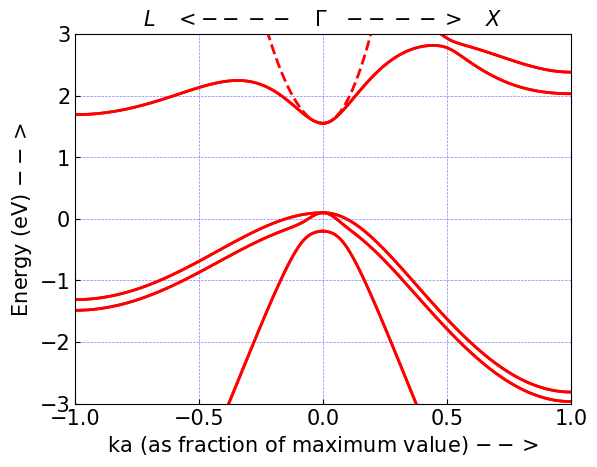

In [5]:
plot(X[0:Nt],Y[0:Nt,:],'r',lw=2)
plot(X[0:Nt],Y1[0:Nt],'r--',lw=2)
plot(X[Nt:2*Nt+1],Y[Nt:2*Nt+1,:],'r',lw=2)
plot(X[Nt:2*Nt+1],Y1[Nt:2*Nt+1],'r--',lw=2)
xlabel(' ka (as fraction of maximum value) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-1,1)
ylim(-3,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L$   $<----$   $\Gamma$   $---->$   $X$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

#Note: X-axis from 0 to +1 represents the -X direction
#while the section from 0 to -1 represents the -L direction

<font color = "stone"><font size = "4" > __Fig. 6.1.2__ Solid curves show the full bandstructure obtained from the sp$^3$s* model described in Chapter 5. The dashed curve shows the dispersion obtained from a one-band effective mass model with parameters adjusted for best fit: $E_c$ = 1.55 eV and $m_c$ = 0.12$m$ ($m$ is the free electron mass). Actually the accepted value for the effective mass for GaAs is 0.07$m$, but the sp$^3$s* model parameters that we use are optimized to give the best fit over the entire band, and are not necessarily very accurate near the band edge. </font>

***

In [6]:
%reset -f
%matplotlib inline
from pylab import *

In [7]:
t=3; m=66;
D=2*m*0.14*sqrt(3)/(2*pi);
Eg=2*t*0.14/D;
kxa=0.05*linspace(-pi,pi,101);
k=kxa/pi;

In [8]:
nu=round(2*m/3)+0;
kyb=2*pi*nu/(2*m);
E11=(3*t/2)*sqrt(((kxa*2/3)**2)+(((abs(kyb)-(2*pi/3))*2/sqrt(3))**2));

In [9]:
nu=round(2*m/3)+1;
kyb=2*pi*nu/(2*m);
E12=(3*t/2)*sqrt(((kxa*2/3)**2)+(((abs(kyb)-(2*pi/3))*2/sqrt(3))**2));

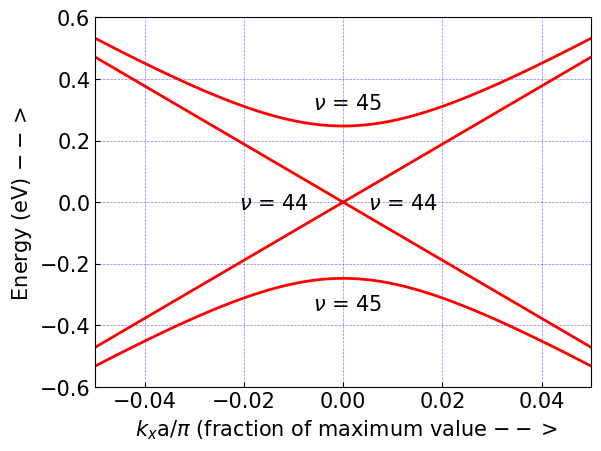

In [10]:
plot(k,E11,'r',lw=2)
plot(k,-E11,'r',lw=2)
plot(k,E12,'r',lw=2)
plot(k,-E12,'r',lw=2)
xlabel(' $\ k_x$a/$\pi$ (fraction of maximum value $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-0.05,0.05)
ylim(-0.6,0.6)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(-0.006,0.3,'$\u03BD$ = 45',fontsize=15)
text(-0.006,-0.35,'$\u03BD$ = 45',fontsize=15)
text(-0.021,-0.025,'$\u03BD$ = 44',fontsize=15)
text(0.005,-0.025,'$\u03BD$ = 44',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.1.7__ Dispersion relation for the two “lowest” subbands of a zigzag nanotube with <br> (a) $D$ = 5.09 nm, $m$ = 66 showing metallic character (no gap in energy spectrum). </font>

In [11]:
%reset -f
%matplotlib inline
from pylab import *

In [12]:
t=3; m=65;
D=2*m*0.14*sqrt(3)/(2*pi);
Eg=2*t*0.14/D;
kxa=0.05*linspace(-pi,pi,101);
k=kxa/pi;

In [13]:
nu=round(2*m/3)+0;
kyb=2*pi*nu/(2*m);
E11=(3*t/2)*sqrt(((kxa*2/3)**2)+(((abs(kyb)-(2*pi/3))*2/sqrt(3))**2));

In [14]:
nu=round(2*m/3)+1;
kyb=2*pi*nu/(2*m);
E12=(3*t/2)*sqrt(((kxa*2/3)**2)+(((abs(kyb)-(2*pi/3))*2/sqrt(3))**2));

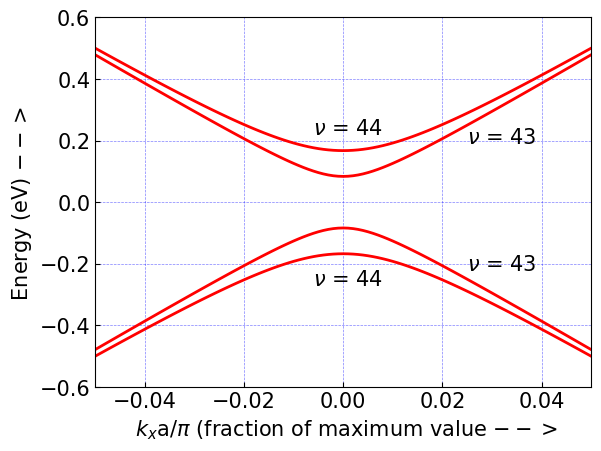

In [15]:
plot(k,E11,'r',lw=2)
plot(k,-E11,'r',lw=2)
plot(k,E12,'r',lw=2)
plot(k,-E12,'r',lw=2)
xlabel(' $\ k_x$a/$\pi$ (fraction of maximum value $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-0.05,0.05)
ylim(-0.6,0.6)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(-0.006,0.22,'$\u03BD$ = 44',fontsize=15)
text(-0.006,-0.27,'$\u03BD$ = 44',fontsize=15)
text(0.025,0.19,'$\u03BD$ = 43',fontsize=15)
text(0.025,-0.22,'$\u03BD$ = 43',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.1.7__ Dispersion relation for the two “lowest” subbands of a zigzag nanotube with <br> (b) $D$ = 5.02 nm, $m$ = 65 showing semiconducting character (gap in energy spectrum). </font>

***

In [16]:
%reset -f
%matplotlib inline
from pylab import *

In [17]:
t=3; kxa=0;
kyb=linspace(-pi,pi,101);
E1=(3*t/2)*sqrt(((kxa*2/3)**2)+(((abs(kyb)-(2*pi/3))*2/sqrt(3))**2));
E2=t*sqrt(1+(4*cos(kyb)*cos(kxa))+(4*cos(kyb)**2));
k=kyb/pi;

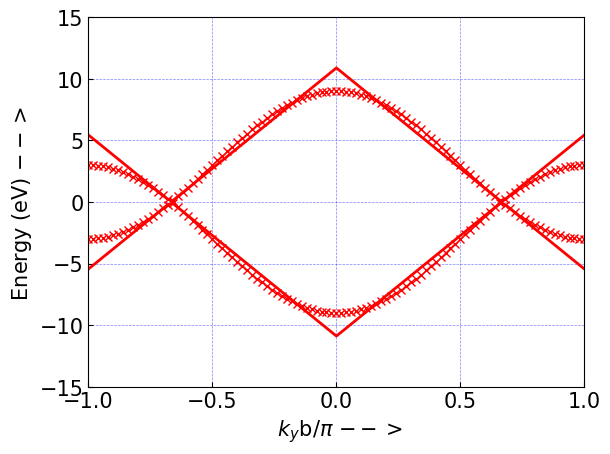

In [18]:
plot(k,E1,'r',lw=2)
plot(k,-E1,'r',lw=2)
plot(k,E2,'rx',lw=2)
plot(k,-E2,'rx',lw=2)
xlabel(' $\ k_y$b/$\pi$ $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-1,1)
ylim(-15,15)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.1.9__ Energy dispersion relation plotted as a function of $k_yb$ along the line $k_xa$ = 0. </font>

***

## <font color = "navy" >6.2 Density of states </font> <a id="6.2"></a>

In [19]:
%reset -f
%matplotlib inline
from pylab import *

In [20]:
hbar=1.055e-34; m=9.110e-31; q=1.602e-19; L=1e-9;
D21=zeros((101)); D22=zeros((101));

In [21]:
Lz1=5e-9;
E01=(hbar**2)*(pi**2)/(2*q*m*(Lz1**2));

for p in range (0,25):#25):
    E1=linspace(-0.1,0.25,101); E1=E1+0j;
    thet1=(real(E1)+abs(real(E1)))/(2*real(E1));
    EE1=real(E1)-((p+1)*(p+1)*E01); theta1=(EE1+abs(EE1))/(2*EE1);
    D11=(L)*q*m*thet1*real((2*m*E1*q)**(-0.5))/(pi*hbar);
    D21=D21+((L**2)*q*m*theta1/(2*pi*hbar*hbar));
    D31=(L**3)*q*m*thet1*real((2*m*E1*q)**0.5)/(2*pi*pi*hbar*hbar*hbar);

In [22]:
Lz2=20e-9;
E02=(hbar**2)*(pi**2)/(2*q*m*(Lz2**2));

for p in range (0,25):
    E2=linspace(-0.1,0.25,101); E2=E2+0j;
    thet2=(real(E2)+abs(real(E2)))/(2*real(E2));
    EE2=real(E2)-((p+1)*(p+1)*E02); theta2=(EE2+abs(EE2))/(2*EE2);
    D12=(L)*q*m*thet2*real((2*m*E2*q)**(-0.5))/(pi*hbar);
    D22=D22+((L**2)*q*m*theta2/(2*pi*hbar*hbar));
    D32=(L**3)*q*m*thet2*real((2*m*E2*q)**0.5)/(2*pi*pi*hbar*hbar*hbar);

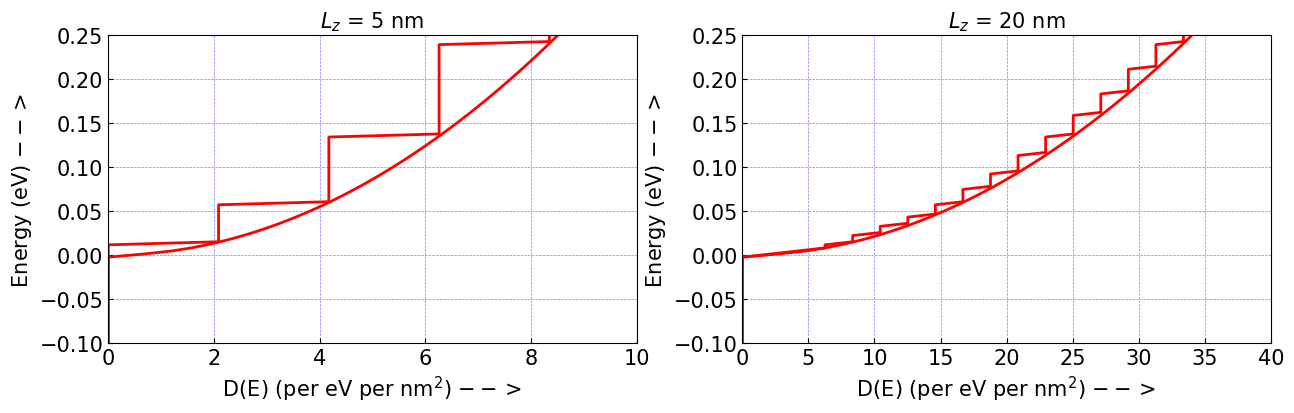

In [23]:
figure(figsize=(15,4))
subplot(1,2,1)
plot(D21,real(E1),'r',lw=2)
plot(D31*Lz1/L,real(E1),'r',lw=2)
xlabel(' D(E) (per eV per nm$^2$) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(0,10) #Part(a)
ylim(-0.1,0.25) #Part(a)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L_z$ = 5 nm',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(D22,real(E2),'r',lw=2)
plot(D32*Lz2/L,real(E2),'r',lw=2)
xlabel(' D(E) (per eV per nm$^2$) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(0,40) #Part(b)
ylim(-0.1,0.25) #Part(b)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L_z$ = 20 nm',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.2.1__ Density of states $D(E)$ for a 2D box (2D with quantized subbands) and compared with that obtained from the 3D relation. As the width $L_z$ of the box is increased from 5 to 20 nm, the DOS approaches the 3D result (the conduction band effective mass $m_c$ is assumed equal to the free electron mass $m$). </font>

***

In [24]:
%reset -f
%matplotlib inline
from pylab import *

In [25]:
t=3; a0=0.14; L=1; a=3*a0/2;
E=linspace(0,0.25,101);
DN1=zeros((101)); DN2=zeros((101));

In [26]:
m=200;
D=2*m*a0*sqrt(3)/(2*pi); Eg=2*t*0.14/D; c=pi*D; 
nu0=round(2*m/3);
DG1=(2*c*L/(2*pi*a*a*t*t))*E;

for nu in range (nu0-100,nu0+100):
    Ek=((t*2*pi/sqrt(3))*((3*nu/(2*m))-1))+(1j*1e-12);
    DN1=DN1+((2*L/(pi*a*t))*abs(real(E/(sqrt((E**2)-(Ek**2))))));

In [27]:
m=800;
D=2*m*a0*sqrt(3)/(2*pi); Eg=2*t*0.14/D; c=pi*D; 
nu0=round(2*m/3);
DG2=(2*c*L/(2*pi*a*a*t*t))*E;

for nu in range (nu0-100,nu0+100):
    Ek=((t*2*pi/sqrt(3))*((3*nu/(2*m))-1))+(1j*1e-12);
    DN2=DN2+((2*L/(pi*a*t))*abs(real(E/(sqrt((E**2)-(Ek**2))))));

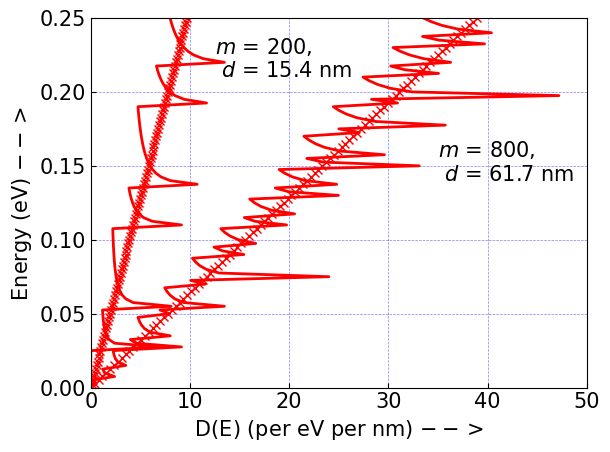

In [28]:
plot(DG1,E,'rx',lw=1)
plot(DN1,E,'r',lw=2)
plot(DG2,E,'rx',lw=1)
plot(DN2,E,'r',lw=2)
xlabel(' D(E) (per eV per nm) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(0,50)
ylim(0,0.25)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(12.5,0.21,'$m$ = 200,\n $d$ = 15.4 nm',fontsize=15)
text(35,0.14,'$m$ = 800,\n $d$ = 61.7 nm',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.2.2__ Density of states $D(E)$ calculated for a zigzag nanotube (solid curves) and compared with that obtained from the result for graphite (crosses). </font>

***

## <font color = "navy" >6.3 Minimum resistance of a wire </font> <a id="6.3"></a>

In [29]:
%reset -f
%matplotlib inline
from pylab import *

In [30]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; q=1.602e-19; a=5e-10; L=10e-9;
k=0.5*linspace(-1,1,201)/a;
Ek=(hbar**2)*(k**2)/(2*0.25*m*q);
EE=linspace(0,0.2,201);

#Subband (1,1)
E1=2*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=((EE-E1)+abs(EE-E1))/(2*abs(EE-E1));

#Subbands (1,2) and (2,1)
E2=5*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((EE-E2)+abs(EE-E2))/(abs(EE-E2)));

#Subband (2,2)
E3=8*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((EE-E3)+abs(EE-E3))/(2*abs(EE-E3)));

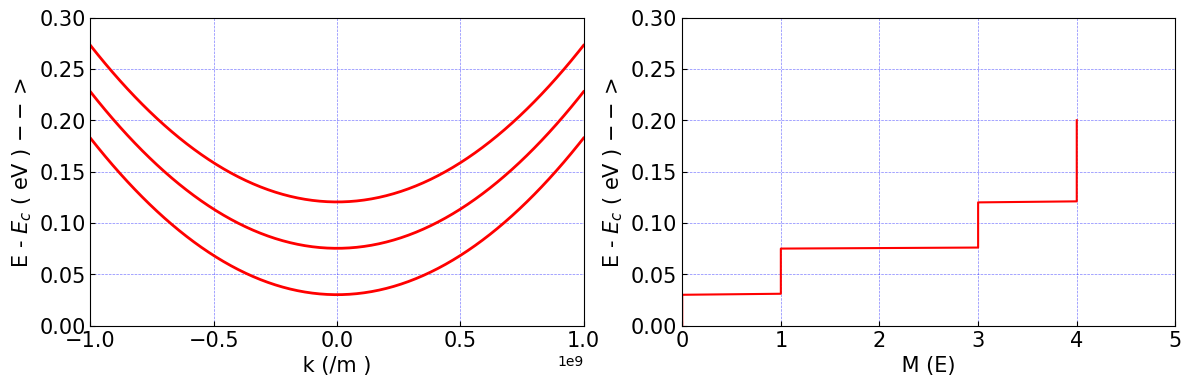

In [31]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(k,E1+Ek,'r',lw=2)
plot(k,E2+Ek,'r',lw=2)
plot(k,E3+Ek,'r',lw=2)
xlabel(' k (/m ) ',fontsize=15)
ylabel(' E -$\ E_c$ ( eV ) $-->$ ',fontsize=15)
xlim(-1e9,1e9)
ylim(0,0.3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(M,EE,'r')
xlabel(' M (E) ',fontsize=15)
ylabel(' E -$\ E_c$ ( eV ) $-->$ ',fontsize=15)
xlim(0,5)
ylim(0,0.3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.3.3__ Energy dispersion relation showing the four lowest conduction band subbands in a rectangular wire with $L_y$ = $L_z$ = 10 nm, $m_c$ = 0.25$m$. </font>

***

In [32]:
%reset -f 
%matplotlib inline
from pylab import *

In [33]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; q=1.602e-19; a=5e-10; L=10e-9;
k=0.5*linspace(-1,1,201)/a;
Ek=-(hbar**2)*(k**2)/(2*0.25*m*q);
EE=linspace(0,-0.2,201);

#Subband (1,1)
E1=-2*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=((E1-EE)+abs(E1-EE))/(2*abs(E1-EE));

#Subbands (1,2) and (2,1)
E2=-5*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((E2-EE)+abs(E2-EE))/(abs(E2-EE)));

#Subband (2,2)
E3=-8*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((E3-EE)+abs(E3-EE))/(2*abs(E3-EE)));

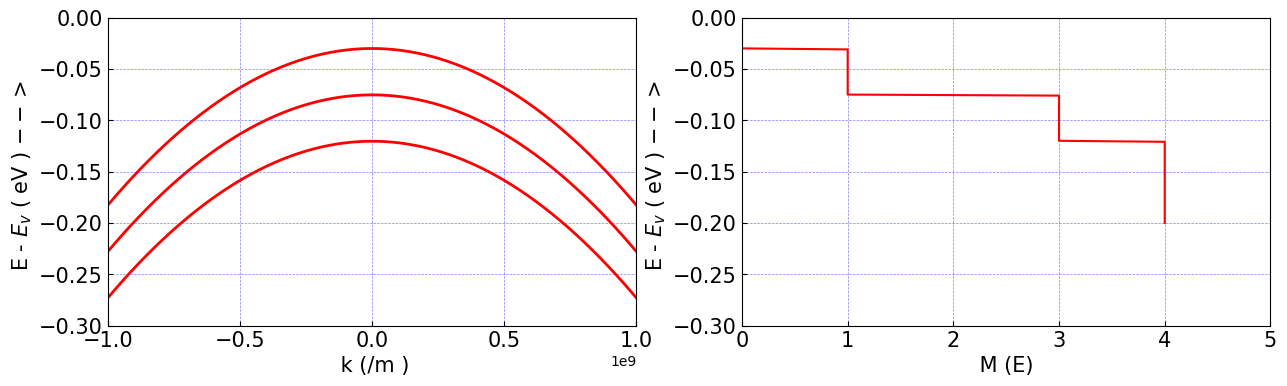

In [34]:
figure(figsize=(15,4))
subplot(1,2,1)
plot(k,E1+Ek,'r',lw=2)
plot(k,E2+Ek,'r',lw=2)
plot(k,E3+Ek,'r',lw=2)
xlabel(' k (/m )',fontsize=15)
ylabel('E -$\ E_v$ ( eV ) $-->$ ',fontsize=15)
xlim(-1e9,1e9)
ylim(-0.3,0)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(-1e9,1.5e9,0.5e9),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(M,EE,'r')
xlabel(' M (E) ',fontsize=15)
ylabel('E -$\ E_v$ ( eV ) $-->$ ',fontsize=15)
xlim(0,5)
ylim(-0.3,0)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 6.3.4__ Energy dispersion relation showing the four highest valence band subbands in a rectangular wire with $L_y$ = $L_z$ = 10 nm, $m_v$ = 0.25$m$. </font>

***